# ****Ml Model****

In [1]:
import pandas as pd
df = pd.read_csv("expense.csv")
df.info()
df['Category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Expense in ₹    336 non-null    object
 1   Notes           336 non-null    object
 2   Payment Method  336 non-null    object
 3   Date            336 non-null    object
 4   For What        336 non-null    object
 5   Category        336 non-null    object
 6   Subcategory     336 non-null    object
 7   Recurring       336 non-null    object
 8   User ID         336 non-null    object
dtypes: object(9)
memory usage: 23.8+ KB


Category
Entertainment             63
Food & Dining             47
Digital Tools and Apps    31
Recharge                  31
Stationery & Reading      30
Transportation            17
Groceries                 17
Accommodation             17
Health                    16
Insurance                 16
Utilities                 15
Personal Expenses         15
Savings & Investments     15
Category                   6
Name: count, dtype: int64

In [2]:
# Remove rows where Category == "Category"
df = df[df['Category'] != "Category"]

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Verify again
print(df['Category'].value_counts())

Category
Entertainment             63
Food & Dining             47
Digital Tools and Apps    31
Recharge                  31
Stationery & Reading      30
Accommodation             17
Transportation            17
Groceries                 17
Health                    16
Insurance                 16
Utilities                 15
Personal Expenses         15
Savings & Investments     15
Name: count, dtype: int64


In [3]:
import re
def clean_text(s):
    if pd.isna(s): return ""
    s = str(s).lower()
    s = re.sub(r'₹|\$|,', '', s)       # remove currency symbols/commas
    s = re.sub(r'\d{2,}', ' <AMOUNT> ', s)  # optionally mask large numbers
    s = re.sub(r'[^a-z0-9\s\+\-@.]', ' ', s) 
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['text'] = (df['Notes'].fillna('') + ' ' + df['For What'].fillna('')).map(clean_text)

In [4]:
df

,Expense in ₹,Notes,Payment Method,Date,For What,Category,Subcategory,Recurring,User ID,text
0,499,Monthly Netflix subscription,Auto-debit,1/15/2023,Netflix,Entertainment,Streaming,Yes,U007,monthly netflix subscription netflix
1,1200,Uber ride to airport,Card,2/10/2023,Uber,Transportation,Public Transit,No,U014,uber ride to airport uber
2,3500,Annual antivirus renewal,Card,3/5/2023,XYZ Software,Digital Tools and Apps,Security,Yes,U021,annual antivirus renewal xyz software
3,150,Coffee with friend,UPI,4/20/2023,Starbucks,Food & Dining,Coffee Shop,No,U003,coffee with friend starbucks
4,2200,Hotel stay during conference,Cash,5/12/2023,OYO,Accommodation,Hotel Charges,No,U018,hotel stay during conference oyo
...,...,...,...,...,...,...,...,...,...,...
325,399,Spotify monthly plan,Auto-debit,7/15/2027,Spotify,Entertainment,Streaming,Yes,U006,spotify monthly plan spotify
326,850,Groceries for weekend,Card,7/20/2027,Big Bazaar,Groceries,Home Essentials,No,U010,groceries for weekend big bazaar
327,199,Mobile recharge pack,UPI,7/25/2027,Jio,Recharge,Data Pack,Yes,U001,mobile recharge pack jio
328,1800,Doctor consultation,Cash,7/30/2027,Fortis,Health,Doctor Visit,No,U020,doctor consultation fortis


In [ ]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), min_df=2)),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', multi_class='ovr'))
])
pipeline.fit(X_train, y_train)

d:\python_ML\.venv_tf\lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

         Accommodation       1.00      1.00      1.00         4
Digital Tools and Apps       1.00      1.00      1.00         6
         Entertainment       1.00      1.00      1.00        13
         Food & Dining       1.00      1.00      1.00         9
             Groceries       1.00      1.00      1.00         3
                Health       1.00      1.00      1.00         3
             Insurance       1.00      1.00      1.00         3
     Personal Expenses       1.00      1.00      1.00         3
              Recharge       1.00      1.00      1.00         6
 Savings & Investments       1.00      1.00      1.00         3
  Stationery & Reading       1.00      1.00      1.00         6
        Transportation       1.00      1.00      1.00         4
             Utilities       1.00      1.00      1.00         3

              accuracy                           1.00        66
             macro avg       1.00     

Classification Report:
                         precision    recall  f1-score   support

         Accommodation       1.00      1.00      1.00         4
Digital Tools and Apps       1.00      1.00      1.00         6
         Entertainment       1.00      1.00      1.00        13
         Food & Dining       1.00      1.00      1.00         9
             Groceries       1.00      1.00      1.00         3
                Health       1.00      1.00      1.00         3
             Insurance       1.00      1.00      1.00         3
     Personal Expenses       1.00      1.00      1.00         3
              Recharge       1.00      1.00      1.00         6
 Savings & Investments       1.00      1.00      1.00         3
  Stationery & Reading       1.00      1.00      1.00         6
        Transportation       1.00      1.00      1.00         4
             Utilities       1.00      1.00      1.00         3

              accuracy                           1.00        66
             m

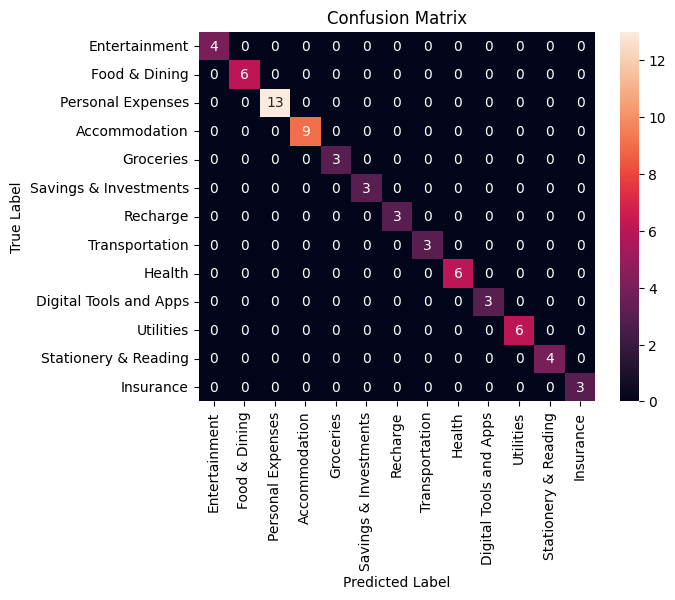

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [9]:
import os
import joblib

# Ensure the directory exists
os.makedirs("models", exist_ok=True)

# Save the pipeline
joblib.dump(pipeline, "models/expense_pipeline.pkl")


['models/expense_pipeline.pkl']

In [15]:
def predict_category(text):
    # Load model
    pipeline = joblib.load("models/expense_pipeline.pkl")
    
    # Clean input
    cleaned = clean_text(text)
    
    # Predict
    pred = pipeline.predict([cleaned])[0]
    proba = pipeline.predict_proba([cleaned])[0].max()
    
    return pred, proba

# Example usage:
text = "30 for Netflix subscription"
category, confidence = predict_category(text)
print(f"Predicted Category: {category}, Confidence: {confidence:.2f}")

Predicted Category: Entertainment, Confidence: 0.40


In [4]:
# predict_and_log.py

import pandas as pd
import re
import joblib
import os
from datetime import datetime

# -----------------------------
# 1. Text Cleaning Function
# -----------------------------
def clean_text(s):
    if pd.isna(s): return ""
    s = str(s).strip().lower()
    s = re.sub(r'₹|\$|,|\.', '', s)
    s = re.sub(r'\d{3,}', '<AMOUNT>', s)
    s = re.sub(r'[^a-z0-9\s\+\-\@\_\&]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# -----------------------------
# 2. Load Trained Model
# -----------------------------
MODEL_PATH = "models/expense_pipeline.pkl"

if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at {MODEL_PATH}. Train it first using train_model.py")

pipeline = joblib.load(MODEL_PATH)

# -----------------------------
# 3. Prediction Function
# -----------------------------
def predict_category(text):
    cleaned = clean_text(text)
    pred = pipeline.predict([cleaned])[0]
    proba = pipeline.predict_proba([cleaned]).max()  # Max probability
    return pred, proba

# -----------------------------
# 4. Log One Expense to CSV
# -----------------------------
def log_expense(expense_text, output_csv="predicted_expenses.csv"):
    category, confidence = predict_category(expense_text)
    
    row = {
        'original_text': expense_text,
        'cleaned_text': clean_text(expense_text),
        'predicted_category': category,
        'confidence': round(confidence, 4),
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }
    
    df_new = pd.DataFrame([row])
    
    if os.path.exists(output_csv):
        df_existing = pd.read_csv(output_csv)
        df_final = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_final = df_new
    
    df_final.to_csv(output_csv, index=False)
    print(f"✅ Logged: '{expense_text}' → {category} (confidence: {confidence:.2f})")
    print(f"   Saved to: {output_csv}\n")

# -----------------------------
# 5. INTERACTIVE MODE — This is what you wanted!
# -----------------------------
if __name__ == "__main__":
    print("🚀 Welcome to AI Expense Tracker!")
    print("Type any expense description (e.g., '30 for Netflix subscription')")
    print("Type 'quit', 'exit', or 'q' to stop.\n")

    while True:
        user_input = input("Enter expense: ").strip()

        if user_input.lower() in ['quit', 'exit', 'q']:
            print("👋 Goodbye! Your expenses have been saved.")
            break

        if not user_input:
            print("⚠️ Please enter a valid expense description.\n")
            continue

        log_expense(user_input)

🚀 Welcome to AI Expense Tracker!
Type any expense description (e.g., '30 for Netflix subscription')
Type 'quit', 'exit', or 'q' to stop.

✅ Logged: '30 rupee for tea' → Groceries (confidence: 0.32)
   Saved to: predicted_expenses.csv

✅ Logged: '60 rupee for file' → Groceries (confidence: 0.32)
   Saved to: predicted_expenses.csv

👋 Goodbye! Your expenses have been saved.


In [7]:
# retrain_with_corrections.py

import pandas as pd
import re
import joblib
import os
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# -----------------------------
# 1. Clean text function (same as before)
# -----------------------------
def clean_text(s):
    if pd.isna(s): return ""
    s = str(s).strip().lower()
    s = re.sub(r'₹|\$|,|\.', '', s)
    s = re.sub(r'\d{3,}', '<AMOUNT>', s)
    s = re.sub(r'[^a-z0-9\s\+\-\@\_\&]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# -----------------------------
# 2. Load original training data + corrections
# -----------------------------
TRAIN_FILE = "expense.csv"      # Your original training data
CORRECTIONS_FILE = "corrections.csv"

if not os.path.exists(TRAIN_FILE):
    raise FileNotFoundError(f"Training data not found: {TRAIN_FILE}")

# Load original data
df_train = pd.read_csv(TRAIN_FILE)
df_train = df_train[df_train['Category'] != "Category"]  # clean
df_train = df_train.dropna(subset=['Category'])
df_train['Category'] = df_train['Category'].str.strip()

# Load corrections
if os.path.exists(CORRECTIONS_FILE):
    df_corr = pd.read_csv(CORRECTIONS_FILE)
    df_corr = df_corr.dropna(subset=['correct_category'])
    df_corr = df_corr.rename(columns={'text': 'Notes', 'correct_category': 'Category'})
    df_corr['For What'] = ""  # placeholder if needed
    df_train = pd.concat([df_train, df_corr[['Notes', 'For What', 'Category']]], ignore_index=True)
    print(f"🔁 Added {len(df_corr)} corrections to training data.")

# -----------------------------
# 3. Preprocess text: combine Notes + For What
# -----------------------------
df_train['text'] = (df_train['Notes'].fillna('') + ' ' + df_train['For What'].fillna('')).map(clean_text)

X = df_train['text']
y = df_train['Category']

# -----------------------------
# 4. Retrain model
# -----------------------------
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), min_df=1, max_features=5000)),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', multi_class='ovr'))
])

pipeline.fit(X, y)

# -----------------------------
# 5. Save updated model
# -----------------------------
os.makedirs("models", exist_ok=True)
joblib.dump(pipeline, "models/expense_pipeline.pkl")
print("✅ Model retrained and saved to models/expense_pipeline.pkl")

# -----------------------------
# 6. Optional: Clear corrections file after retraining
# -----------------------------
# Uncomment next line if you want to reset corrections after each retrain
# open(CORRECTIONS_FILE, 'w').close()  # Clears file
print("💡 Tip: Run this script weekly to improve accuracy automatically!")

🔁 Added 1 corrections to training data.
✅ Model retrained and saved to models/expense_pipeline.pkl
💡 Tip: Run this script weekly to improve accuracy automatically!


d:\python_ML\.venv_tf\lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
# predict_and_log.py

import pandas as pd
import re
import joblib
import os
from datetime import datetime

# -----------------------------
# 1. Text Cleaning Function
# -----------------------------
def clean_text(s):
    if pd.isna(s): return ""
    s = str(s).strip().lower()
    s = re.sub(r'₹|\$|,|\.', '', s)
    s = re.sub(r'\d{3,}', '<AMOUNT>', s)
    s = re.sub(r'[^a-z0-9\s\+\-\@\_\&]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# -----------------------------
# 2. Load Trained Model
# -----------------------------
MODEL_PATH = "models/expense_pipeline.pkl"
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at {MODEL_PATH}. Train it first using train_model.py")
pipeline = joblib.load(MODEL_PATH)

# -----------------------------
# 3. Prediction Function
# -----------------------------
def predict_category(text):
    cleaned = clean_text(text)
    pred = pipeline.predict([cleaned])[0]
    proba = pipeline.predict_proba([cleaned]).max()  # Max probability across classes
    return pred, proba

# -----------------------------
# 4. Log One Expense + Handle Corrections
# -----------------------------
def log_expense(expense_text, output_csv="predicted_expenses.csv", corrections_csv="corrections.csv"):
    predicted_cat, confidence = predict_category(expense_text)
    
    # Clean text for consistency
    cleaned_text = clean_text(expense_text)
    
    # Log base prediction
    row = {
        'original_text': expense_text,
        'cleaned_text': cleaned_text,
        'predicted_category': predicted_cat,
        'confidence': round(confidence, 4),
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'user_verified': None,       # Will be filled if corrected
        'correct_category': None     # Will be filled if corrected
    }

    # --- LOW CONFIDENCE: ASK FOR CORRECTION ---
    if confidence < 0.6:
        print(f"\n⚠️ Low confidence ({confidence:.2f}): Model predicted '{predicted_cat}'")
        print(f"   Text: '{expense_text}'")
        
        while True:
            user_input = input("✅ Is this correct? (y/n) or type correct category: ").strip().lower()
            
            if user_input in ['y', 'yes', '']:
                row['user_verified'] = 'yes'
                row['correct_category'] = predicted_cat
                print("✔️ Saved as-is.\n")
                break
            elif user_input in ['n', 'no']:
                correct_cat = input("👉 Please enter the correct category: ").strip()
                if correct_cat:
                    row['user_verified'] = 'no'
                    row['correct_category'] = correct_cat
                    print(f"✔️ Corrected to: {correct_cat}\n")
                    
                    # Save correction to corrections.csv for retraining
                    corr_row = {
                        'text': expense_text,
                        'correct_category': correct_cat,
                        'source': 'user_correction',
                        'timestamp': row['timestamp']
                    }
                    df_corr = pd.DataFrame([corr_row])
                    if os.path.exists(corrections_csv):
                        df_corr.to_csv(corrections_csv, mode='a', header=False, index=False)
                    else:
                        df_corr.to_csv(corrections_csv, index=False)
                    print(f"💾 Correction saved to {corrections_csv}")
                else:
                    print("⚠️ No category entered. Skipping correction.")
                break
            else:
                # User typed a category directly
                row['user_verified'] = 'no'
                row['correct_category'] = user_input
                print(f"✔️ Corrected to: {user_input}\n")
                
                # Save correction
                corr_row = {
                    'text': expense_text,
                    'correct_category': user_input,
                    'source': 'user_correction',
                    'timestamp': row['timestamp']
                }
                df_corr = pd.DataFrame([corr_row])
                if os.path.exists(corrections_csv):
                    df_corr.to_csv(corrections_csv, mode='a', header=False, index=False)
                else:
                    df_corr.to_csv(corrections_csv, index=False)
                print(f"💾 Correction saved to {corrections_csv}")
                break

    # Always save original prediction (even if corrected)
    df_new = pd.DataFrame([row])
    if os.path.exists(output_csv):
        df_existing = pd.read_csv(output_csv)
        df_final = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_final = df_new
    df_final.to_csv(output_csv, index=False)
    
    print(f"✅ Logged: '{expense_text}' → {predicted_cat} (confidence: {confidence:.2f})")
    print(f"   Saved to: {output_csv}\n")

# -----------------------------
# 5. Interactive Mode
# -----------------------------
if __name__ == "__main__":
    print("🚀 Welcome to AI Expense Tracker with Active Learning!")
    print("Type any expense description (e.g., '30 for Netflix subscription')")
    print("Type 'quit', 'exit', or 'q' to stop.\n")

    while True:
        user_input = input("Enter expense: ").strip()

        if user_input.lower() in ['quit', 'exit', 'q']:
            print("👋 Goodbye! Your expenses and corrections have been saved.")
            break

        if not user_input:
            print("⚠️ Please enter a valid expense description.\n")
            continue

        log_expense(user_input)

🚀 Welcome to AI Expense Tracker with Active Learning!
Type any expense description (e.g., '30 for Netflix subscription')
Type 'quit', 'exit', or 'q' to stop.


⚠️ Low confidence (0.29): Model predicted 'stationary'
   Text: '30 rupees for notebook'
✔️ Saved as-is.

✅ Logged: '30 rupees for notebook' → stationary (confidence: 0.29)
   Saved to: predicted_expenses.csv


⚠️ Low confidence (0.41): Model predicted 'stationary'
   Text: '60 rupees for classmate notebook'
✔️ Saved as-is.

✅ Logged: '60 rupees for classmate notebook' → stationary (confidence: 0.41)
   Saved to: predicted_expenses.csv


⚠️ Low confidence (0.35): Model predicted 'stationary'
   Text: '89 rupee for classmate practical file'
✔️ Saved as-is.

✅ Logged: '89 rupee for classmate practical file' → stationary (confidence: 0.35)
   Saved to: predicted_expenses.csv


⚠️ Low confidence (0.29): Model predicted 'stationary'
   Text: '10 rupees for tea'
✔️ Corrected to: Food

💾 Correction saved to corrections.csv
✅ Logged: '1